In [1]:
#libraries for data analysis
import pandas as pd
import numpy as np
#libraries for normality tests
from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#import the User Datasets

xls = pd.ExcelFile('Channel_Bounce.xlsx')
Organic_Search = pd.read_excel(xls, 'Organic Search')
Direct = pd.read_excel(xls, 'Direct')
Referral = pd.read_excel(xls, 'Referral')
Social = pd.read_excel(xls, 'Social')
Affiliates = pd.read_excel(xls, 'Affiliates')
Paid_Search = pd.read_excel(xls, 'Paid Search')


In [3]:
#Remove the dates for ease
Organic_Search = Organic_Search['Bounce Rate']
Direct = Direct['Bounce Rate']
Referral = Referral['Bounce Rate']
Social = Social['Bounce Rate']
Affiliates = Affiliates['Bounce Rate']
Paid_Search = Paid_Search['Bounce Rate']

In [4]:
#convert datasets into arrays
Organic_Search = Organic_Search.values
Direct = Direct.values
Referral = Referral.values
Social = Social.values
Affiliates = Affiliates.values
Paid_Search = Paid_Search.values

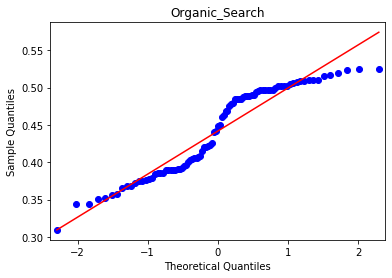

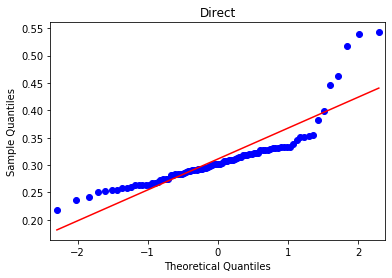

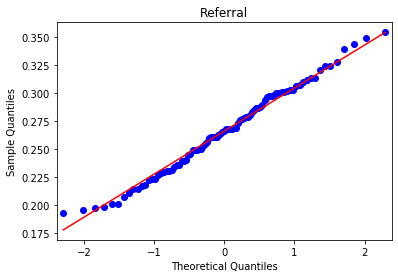

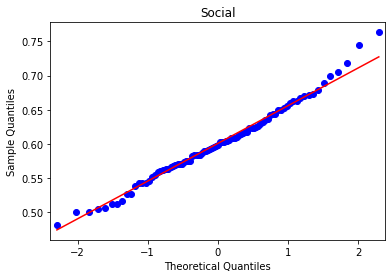

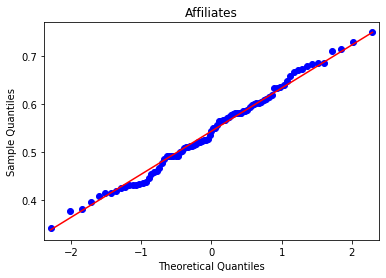

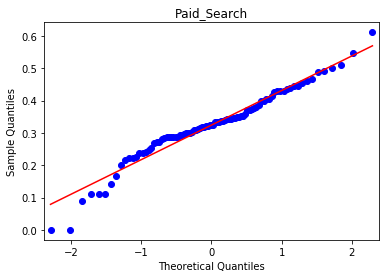

In [5]:
#plot both datasets using qqplot to check for normality
names = ["Organic_Search", "Direct", "Referral", "Social", "Affiliates", "Paid_Search"]
for index, i in enumerate((Organic_Search, Direct, Referral, Social, Affiliates, Paid_Search)):
    
    qqplot(i, line='s')
    plt.title(names[index])
    pyplot.show()

### Both datasets look not normal since they fall off the qq plot

In [6]:
# normality test with Shapiro
names = ["Organic_Search", "Direct", "Referral", "Social", "Affiliates", "Paid_Search"]
for index, i in enumerate((Organic_Search, Direct, Referral, Social, Affiliates, Paid_Search)):
    stat, p = shapiro(i)
    print(names[index])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

Organic_Search
Statistics=0.909, p=0.000
Sample does not look Gaussian (reject H0)
Direct
Statistics=0.783, p=0.000
Sample does not look Gaussian (reject H0)
Referral
Statistics=0.985, p=0.376
Sample looks Gaussian (fail to reject H0)
Social
Statistics=0.988, p=0.566
Sample looks Gaussian (fail to reject H0)
Affiliates
Statistics=0.988, p=0.558
Sample looks Gaussian (fail to reject H0)
Paid_Search
Statistics=0.966, p=0.018
Sample does not look Gaussian (reject H0)


### Since all datasets are not normaly distributed non-parametric tests should be used.

In [7]:
### Create a single dataframe
from pandas import DataFrame
data = {"Organic_Search": Organic_Search ,"Direct": Direct,
        "Referral": Referral, "Social": Social,
        "Affiliates" : Affiliates, "Paid_Search": Paid_Search}
df = DataFrame(data, columns = names)
df.head()

,Organic_Search,Direct,Referral,Social,Affiliates,Paid_Search
0,0.441581,0.298450,0.235669,0.672131,0.543478,0.428571
1,0.378007,0.264259,0.200787,0.584158,0.492308,0.444444
2,0.367960,0.235294,0.207763,0.583333,0.380282,0.200000
3,0.390951,0.258974,0.211268,0.596154,0.509804,0.000000
4,0.389147,0.286344,0.263158,0.602410,0.678571,0.111111


In [12]:
#Visualise basic descriptive statistics about the dataset
import pandas_profiling as pdp

report = pdp.ProfileReport(df, title='Pandas Profiling Report')

report.to_file(output_file="Correlation1_report.html")

report

In [9]:
# compute the correlation
df_corr = df.corr(method='spearman')
df_corr

,Organic_Search,Direct,Referral,Social,Affiliates,Paid_Search
Organic_Search,1.000000,0.160727,0.192037,0.085999,-0.315817,-0.119854
Direct,0.160727,1.000000,0.322648,-0.003468,-0.090437,0.044490
Referral,0.192037,0.322648,1.000000,0.140788,0.074606,-0.043761
Social,0.085999,-0.003468,0.140788,1.000000,0.339287,-0.063897
Affiliates,-0.315817,-0.090437,0.074606,0.339287,1.000000,0.109590
Paid_Search,-0.119854,0.044490,-0.043761,-0.063897,0.109590,1.000000


In [10]:
from scipy import stats
# Matrix of correlation p-values
df_p = pd.DataFrame()  
for x in df.columns:
    for y in df.columns:
        corr = stats.pearsonr(df[x], df[y])
        df_corr.loc[x,y] = corr[0]
        df_p.loc[x,y] = corr[1]
df_p

,Organic_Search,Direct,Referral,Social,Affiliates,Paid_Search
Organic_Search,0.000000,0.141111,0.153602,0.204542,0.001749,0.854205
Direct,0.141111,0.000000,0.069944,0.890884,0.276142,0.478958
Referral,0.153602,0.069944,0.000000,0.274266,0.466332,0.615870
Social,0.204542,0.890884,0.274266,0.000000,0.011680,0.740426
Affiliates,0.001749,0.276142,0.466332,0.011680,0.000000,0.320819
Paid_Search,0.854205,0.478958,0.615870,0.740426,0.320819,0.000000


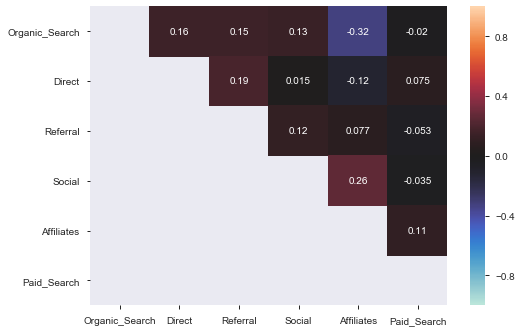

In [11]:
#Visualise the correlation
import seaborn as sn
mask = np.tril(df.corr())
corrMatrix = df.corr()

sn.heatmap(corrMatrix, annot=True, vmin=-1, vmax=1, center= 0, mask = mask)